In [7]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [8]:
filename = "2_1_2_1_transmission_withoutgrating"


#Try reading the file
data1 = np.loadtxt(f"{filename}", skiprows=10, usecols=np.arange(2,200,1, dtype=int))
data2 = np.loadtxt(f"{filename} 2nd part", skiprows=10, usecols=np.arange(2,200,1, dtype=int))
data3 = np.loadtxt(f"{filename} 3rd part", skiprows=10, usecols=np.arange(2,112,1, dtype=int))

agg_data = np.zeros(shape=(2, data1.shape[1] + data2.shape[1] + data3.shape[1]))
agg_data[:,0:data1.shape[1]] = data1
agg_data[:,data1.shape[1]:data1.shape[1] + data2.shape[1]] = data2
agg_data[:,data1.shape[1] + data2.shape[1]:data1.shape[1] + data2.shape[1] + data3.shape[1]] = data3



(0.0, 1.0)

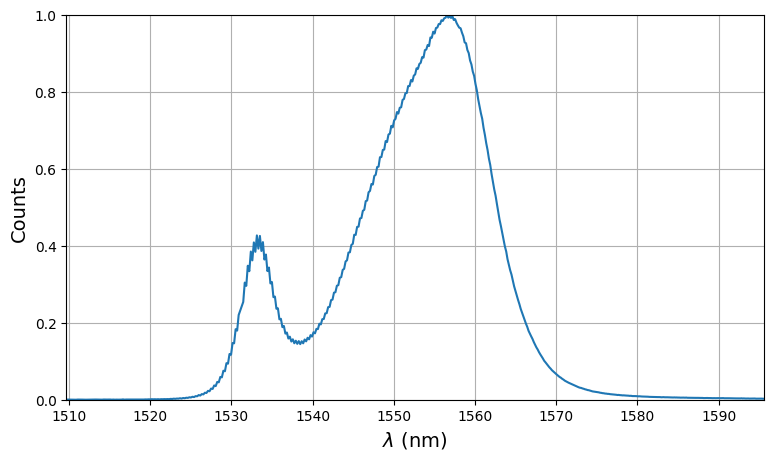

In [9]:
fig, ax = plt.subplots(1,1, figsize = (9,5))
ax.plot(agg_data[0,:], agg_data[1,:]/np.max(agg_data[1,:]))
ax.set_xlabel("$\lambda$ (nm)", fontsize = 14)
ax.set_ylabel("Counts", fontsize = 14)
ax.grid(True)
ax.set_xlim(agg_data[0,-1], agg_data[0,0])
ax.set_ylim(0,1)

In [10]:
# Make a function to extract the data
def extract(fname):
    #Try reading the file
    data1 = np.loadtxt(f"{fname}", skiprows=10, usecols=np.arange(2,200,1, dtype=int))
    data2 = np.loadtxt(f"{fname} 2nd part", skiprows=10, usecols=np.arange(2,200,1, dtype=int))
    data3 = np.loadtxt(f"{fname} 3rd part", skiprows=10, usecols=np.arange(2,112,1, dtype=int))
    
    agg_data = np.zeros(shape=(2, data1.shape[1] + data2.shape[1] + data3.shape[1]))
    agg_data[:,0:data1.shape[1]] = data1
    agg_data[:,data1.shape[1]:data1.shape[1] + data2.shape[1]] = data2
    agg_data[:,data1.shape[1] + data2.shape[1]:data1.shape[1] + data2.shape[1] + data3.shape[1]] = data3
    
    return agg_data

In [11]:
t_fbg = extract("2_1_2_1_transmission_withgrating")
r_fbg = extract("2_1_2_1_reflection_withgrating")

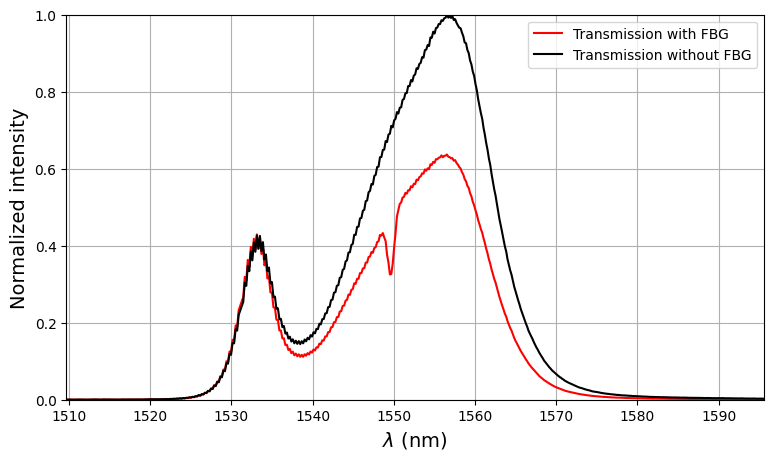

In [12]:
fig_t_fbg, ax_t_fbg = plt.subplots(1,1, figsize = (9,5))
ax_t_fbg.plot(t_fbg[0,:], t_fbg[1,:]/(np.max(t_fbg[1,:]*1.57)), label = "Transmission with FBG", color = 'red')
ax_t_fbg.plot(agg_data[0,:], agg_data[1,:]/np.max(agg_data[1,:]), label = "Transmission without FBG", color = 'black')
ax_t_fbg.set_xlabel("$\lambda$ (nm)", fontsize = 14)
ax_t_fbg.set_ylabel("Normalized intensity", fontsize = 14)
ax_t_fbg.grid(True)
ax_t_fbg.set_xlim(t_fbg[0,-1], t_fbg[0,0])
ax_t_fbg.set_ylim(0,1)
ax_t_fbg.legend()

In [13]:
def inv_gaussian(x, y0, x0, sigma, scale):
    return y0 - scale*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-np.power(x-x0,2)/(2*sigma**2))
def gaussian(x, x0, sigma, scale):
    return scale*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-np.power(x-x0,2)/(2*sigma**2))

[6.77798046e-01 1.54964650e+03 4.11650984e-01 2.21618532e-01]
[1.54963439e+03 4.25890641e-01 9.35907524e-02]
1.0029724604019143
0.08766876885765607
0.46302143637608


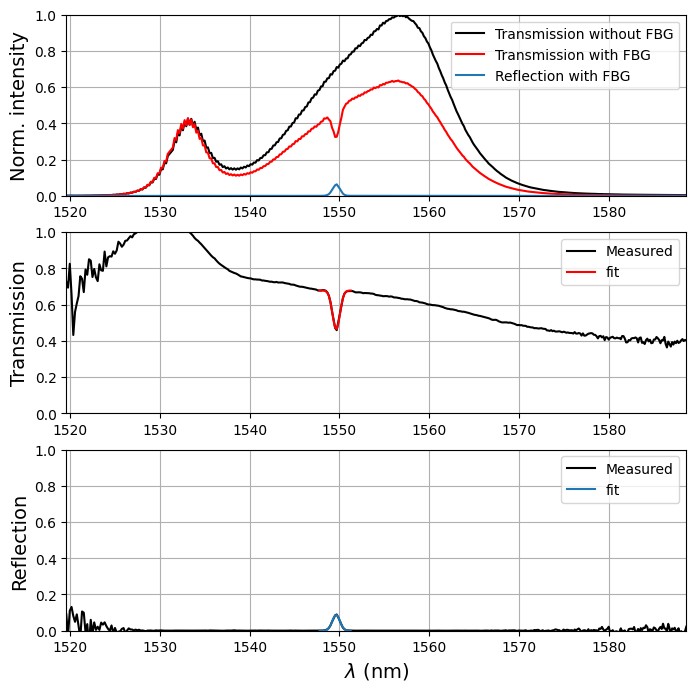

In [18]:
# do another normalization
min_idx = 50
max_idx = -50

fit_min = 235
fit_max = -150


transmission = (t_fbg[1,min_idx:max_idx]/(np.max(t_fbg[1,min_idx:max_idx]*1.57)))/(agg_data[1,min_idx:max_idx]/np.max(agg_data[1,min_idx:max_idx]))
wl = t_fbg[0,min_idx:max_idx]

transmission_fit = transmission[fit_min:fit_max]
wl_fit = wl[fit_min:fit_max]

reflection_int = (t_fbg[1,min_idx:max_idx]/(np.max(t_fbg[1,min_idx:max_idx]*1.57)))

reflection = (r_fbg[1,min_idx:max_idx]/(np.max(t_fbg[1,min_idx:max_idx]*1.57)))/(agg_data[1,min_idx:max_idx]/np.max(agg_data[1,min_idx:max_idx]))

reflection_fit = reflection[fit_min:fit_max]


# do fitting
fit = curve_fit(inv_gaussian, wl_fit, transmission_fit, p0=[0.68, 1549.65, 0.38, 0.21])[0]
print(fit)
r_fit = curve_fit(gaussian, wl_fit, reflection_fit, p0=[1549.65, 0.38, 0.21])[0]
print(r_fit)


fig_sub, ax_sub = plt.subplots(3,1,figsize = (8,8), sharex=False)
ax_sub[1].plot(t_fbg[0,min_idx:max_idx], transmission, color = 'black', label = "Measured")
#ax_sub.plot(wl_fit, transmission_fit)
ax_sub[1].plot(wl_fit, inv_gaussian(wl_fit, fit[0], fit[1], fit[2], fit[3]), label = 'fit', color = 'red')
#ax_sub.plot(t_fbg[0,fit_min:fit_max], inv_gaussian(t_fbg[0,fit_min:fit_max], 0.68, 1549.65, 0.38, 0.21))
ax_sub[1].grid()
ax_sub[1].set_xlim(t_fbg[0, max_idx-1], t_fbg[0, min_idx])
ax_sub[1].set_ylim(0,1)
#ax_sub[1].set_xlabel("$\lambda$ (nm)", fontsize = 14)
ax_sub[1].set_ylabel("Transmission", fontsize = 14)
ax_sub[1].legend()


ax_sub[0].plot(agg_data[0,min_idx:max_idx], agg_data[1,min_idx:max_idx]/np.max(agg_data[1,:]), label = "Transmission without FBG", color = 'black')
ax_sub[0].plot(t_fbg[0,min_idx:max_idx], t_fbg[1,min_idx:max_idx]/(np.max(t_fbg[1,:]*1.57)), label = "Transmission with FBG", color = 'red')
ax_sub[0].plot(t_fbg[0,min_idx:max_idx], r_fbg[1,min_idx:max_idx]/(np.max(t_fbg[1,:]*1.57)), label = "Reflection with FBG")
#ax_sub[0].set_xlabel("$\lambda$ (nm)", fontsize = 14)
ax_sub[0].set_ylabel("Norm. intensity", fontsize = 14)
ax_sub[0].grid(True)
ax_sub[0].set_xlim(t_fbg[0, max_idx-1], t_fbg[0, min_idx])
ax_sub[0].set_ylim(0,1)
ax_sub[0].legend()

ax_sub[2].plot(t_fbg[0,min_idx:max_idx], reflection, color = 'black', label = "Measured")
#ax_sub.plot(wl_fit, transmission_fit)
ax_sub[2].plot(wl_fit, gaussian(wl_fit, r_fit[0], r_fit[1], r_fit[2]), label = 'fit')
#ax_sub.plot(t_fbg[0,fit_min:fit_max], inv_gaussian(t_fbg[0,fit_min:fit_max], 0.68, 1549.65, 0.38, 0.21))
ax_sub[2].grid()
ax_sub[2].set_xlim(t_fbg[0, max_idx-1], t_fbg[0, min_idx])
ax_sub[2].set_ylim(0,1)
ax_sub[2].set_xlabel("$\lambda$ (nm)", fontsize = 14)
ax_sub[2].set_ylabel("Reflection", fontsize = 14)
ax_sub[2].legend()


print(2.355*r_fit[1])
print(gaussian(r_fit[0],r_fit[0], r_fit[1], r_fit[2]))
print(inv_gaussian(fit[1], fit[0], fit[1], fit[2], fit[3]))
fig_sub.savefig("ITR graph temperature FBG.svg", format = 'svg')

In [19]:
L = 1.27e-3

In [21]:
print((1/L)*np.arctanh(np.sqrt(gaussian(r_fit[0],r_fit[0], r_fit[1], r_fit[2]))))

240.33657074273586
